In [ ]:
#Como primer punto es generar una lista con valores aleatorios
import numpy as np
#numero de pruebas
import matplotlib.pyplot as plt
import time

n=[1000, 10000, 100000, 1000000]

error=[]
tiempo=[]
for i in n:
    t1=time.time()
    j= np.random.random((i, 2))   
    z= np.sqrt(j[:,0]*j[:,0]+j[:,1]*j[:,1])
    condi1=z<1
    bb=condi1.sum()
    pi= 4*bb/i
    error.append(100*abs(pi-np.pi)/np.pi)
    t2=time.time()
    tiempo.append(t2-t1)
    

In [ ]:
tiempo

In [ ]:
plt.plot(tiempo,'bx')
plt.grid()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 23 13:55:59 2020

@author: Alienware
"""

import numpy as np
#numero de pruebas
import matplotlib.pyplot as plt
from time import time

n=np.logspace(2,6,4)
n=np.abs(n)
plt.plot(n)
plt.grid()

error=[]
tiempo=[]


plt.figure(figsize=(15,15))

for k,i in enumerate(n):
    t1=time()
    j= np.random.random((int(i), 2))   
    z= np.sqrt(j[:,0]*j[:,0]+j[:,1]*j[:,1])
    condi1=z<1
    bb=condi1.sum()
    pi= 4*bb/i
    error.append(100*abs(pi-np.pi)/np.pi)
    t2=time()
    tiempo.append(t2-t1)
    a1=np.ma.masked_where(z<1, z)
    a2=np.ma.masked_where(z>=1, z)
    plt.subplot(2,2,k+1)
    plt.scatter(j[:,0], j[:,1], s=a1)
    plt.scatter(j[:,0], j[:,1], s=a2)


In [ ]:
n

In [ ]:
#en este caso siempre se usa

In [22]:

#Declaración de librerias a usar
import numpy as np
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
import random

def mcpi(n=10000):
	"""

Esta función aproxima por el metodo de monte carlo
el valor de Pi, mediante la relacion del area de un cuadrado
con una circunferencia adscrita. 
Tiene un valor de entrada, n que es el numero de veces que se 
realizara el experimento
Devuelve 
el valor n usado (por defecto 10**4), el error de la aproximación con el 
valor de pi mas exacto y el tiempo que demora en realizar la simulación
 n,err, tiempo 
 El método que usa esta función es random.random

	"""
	t1=time()
	#se generan los N lanzamientos
	j=np.random.random((n,2))
	#calculamos la distancia a cada punto generado
	z=np.sqrt(j[:,0]*j[:,0]+j[:,1]*j[:,1])
	#caen en el circulo siempre que sea menor al radio
	circ=z<1 
	AC=circ.sum()
	#todos los puntos caen en el cuadrado
	#entonces el calculo de pi es:
	pi_est=4*AC/n
	#VALORES DE INTERES
	t2=time()
	tiempo=t2-t1
	err= pi_est-np.pi
	return n,err, tiempo

def stats(n=10000,m=10):
	""" 
		Esta función repite el calculo
		de pi mediante la funcion mcpi() varias veces, para hacer una estadistica
		de los valores del error y tiempo de computo
	"""
	err=[]
	tmp=[]
	for i in range(m):
		_,error,tiempo=mcpi(n)
		err.append(error)
		tmp.append(tiempo)
	mean_err=np.mean(err)
	std_err=np.std(err)
	mean_tmp=np.mean(tmp)
	std_tmp=np.std(tmp)
	return mean_err,std_err


statsv=np.vectorize(stats)
NN=np.logspace(2,6,25,dtype=np.int64)
A=[]
for i in range(40):
    random.seed(int(time()))
    a,s = statsv(NN,15)
    A.append(a)
for i in range(40):
    plt.plot(A[i])
plt.grid()


KeyboardInterrupt: 

In [ ]:
for i in range(40):
    plt.plot(A[i])
plt.grid()

In [27]:
import montepi as mcpi
import numpy as np

err=[]
tmp=[]
pimc=[]
for i in range(1000):
	pi,error,tiempo=mcpi.mcpi(100000)
	err.append(error)
	tmp.append(tiempo)
	pimc.append(pi)
	mean_err=np.mean(err)
	std_err=np.std(err)
	mean_tmp=np.mean(tmp)
	std_tmp=np.std(tmp)



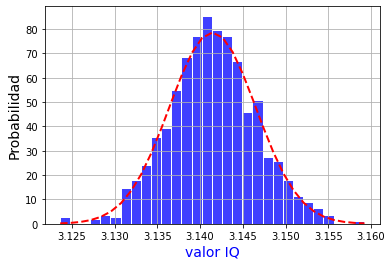

In [62]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm

yhist, xhist, patches = plt.hist(pimc, 30, density=1, facecolor='b', alpha=0.75, rwidth = 0.9)
plt.grid(True)
y = norm.pdf(xhist, np.mean(pimc), np.std(pimc))

plt.plot(xhist, y, "r--", linewidth=2)
plt.xlabel('valor IQ', fontsize=14, color='b')

plt.ylabel('Probabilidad', fontsize=14)

plt.draw()